# Exercise 6C - Sampling Strategies

Objective: Illustrate how sampling strategies effect the search for the global minimum using a single-variable function and multi-variable function as an example.

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all the necessary Python packages
<span style="color:orange"> All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt </span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## 1. Objective Functions

First we will define the objective functions to be used in this exercise. 
1. A one-dimensional sinusoidal function with multiple local minimums
2. A two-dimensional exponential function with multiple local minimums. This function was also used in Exercise 4A.


In [2]:
def function_1(x):
    return 0.03 * x**4 + 0.1 * x**3 -0.02 * x **2 - 0.55 * x - np.cos(5*x) / 2 + np.sin(3 * x)

def function_2(x_1, x_2):
    return 3 * (1 - x_1) ** 2 * np.exp(-x_1 ** 2 - (x_2 + 1)**2) - 10 * (x_1 / 5 - x_1 ** 3 - x_2 ** 5) * np.exp(-(x_1) ** 2 - (x_2 **2)) - 3 * np.exp (-( x_1 + 2)**2 - x_2 **2) + 0.5 * (x_1 + x_2)

## 2. One-dimensional problem

Set the constraints for this problem. 

<span style="color:lime;">Why is this of particular importance for a function like this?</span>


In [3]:
# Set the limits for analysis
x_min = -4
x_max = 4


Let's also set a random seed for replicability across runs. I choose the digits of &radic;2

In [4]:
random_seed = 1414213

### 2.1 Plotting the function

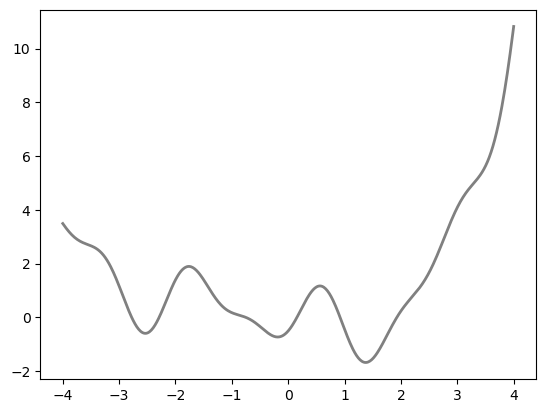

In [5]:
_x = np.linspace (x_min, x_max, 500)
_y = function_1(_x)

fig, ax = plt.subplots()

ax.plot(_x, _y, color = "grey", linewidth = 2)


## 2.2 Random Samples

### 2.2.1 Using 4 samples

The minimum value found is -0.0273.


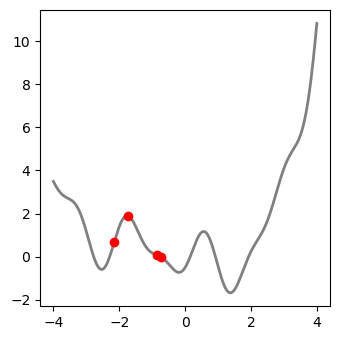

In [6]:
# Set up a random number generator (RNG) object with a fixed random seed.
# NOTE: You need to enter this line into every Jupyter cell that you want to use a fixed random seed
rng = np.random.default_rng(random_seed)

# Generate the random values for x and then solve for y
x_4 = rng.uniform(x_min, x_max, 4)
y_4 = function_1(x_4)

print (f"The minimum value found is {y_4.min():.4f}.")

fig, ax = plt.subplots()
ax.plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax.scatter(x_4, y_4, c = "red")

fig.set_figwidth(3.5)
fig.set_figheight(3.5)
fig.tight_layout()


plt.show()


### 2.2.2. Using more random samples

The minimum value found after 4 random samples is -0.0273.
The minimum value found after 8 random samples is -1.3486.
The minimum value found after 16 random samples is -0.6800.
Image saved to outputs/images/Lecture 6B_randomSampling.svg.


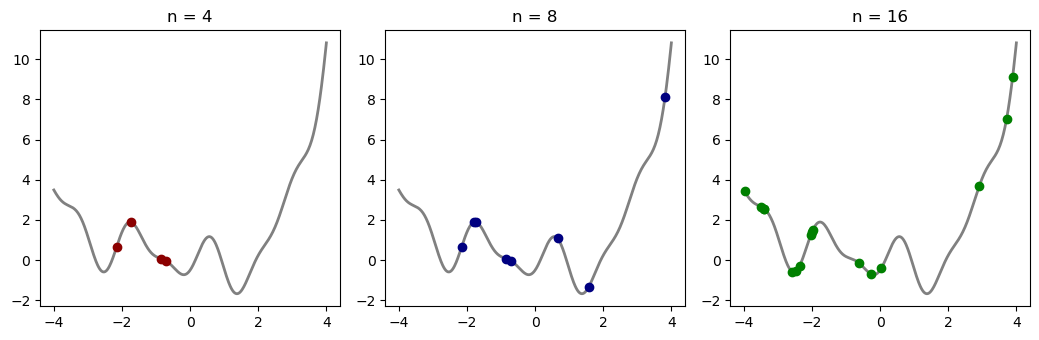

In [7]:
# Set up a random number generator (RNG) object with a fixed random seed.
rng = np.random.default_rng(random_seed)

# 8 random samples
x_8 = rng.uniform(x_min, x_max, 8)
y_8 = function_1(x_8)

#16 random samples
x_16 = rng.uniform(x_min, x_max, 16)
y_16 = function_1(x_16)

print (f"The minimum value found after 4 random samples is {y_4.min():.4f}.")
print (f"The minimum value found after 8 random samples is {y_8.min():.4f}.")
print (f"The minimum value found after 16 random samples is {y_16.min():.4f}.")

fig, ax = plt.subplots(ncols = 3)
ax[0].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[1].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[2].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[0].scatter(x_4, y_4, c = "darkRed")
ax[1].scatter(x_8, y_8, c = "navy")
ax[2].scatter(x_16, y_16, c = "green")

ax[0].set_title("n = 4")
ax[1].set_title("n = 8")
ax[2].set_title("n = 16")

fig.set_figwidth(10.5)
fig.set_figheight(3.5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_randomSampling.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


Results may vary depending on the random seed chosen. You should find that the minimum value found *stays the same or decreases* as we increase the number of samples.

<span style = "color:dodgerblue;"> NOTE: At the en of the previous cell I have code which saves the graph. I chose to save it in a vector format (.svg) rather than a raster format (jpeg or png). Vector graphics do not lose image quality when zooming or become pixelated. They are designed to work well in browsers. It is recommended to save graphs as svgs unless you have large amounts of information in the graph (10s of thousands of scatter points) in which case pngs may be more suitable.

### 2.2.3 How Many Random Samples are Required to be Confidant We Have Found the Minimum?

To answer this we will do the same procedure as above but increase the number of samples one-by-one until we begin to converge.

For this part of the exercise, we will turn off the random number generator.

The global minimum found was -1.6742240221878792.
Image saved to outputs/images/Lecture 6B_randomSampling2.svg.


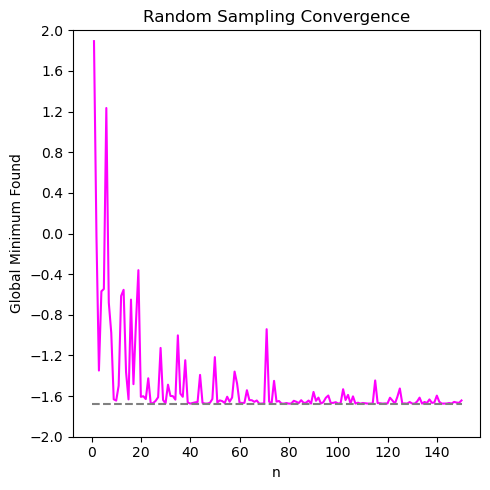

In [8]:
# Set up a random number generator (RNG) object with a fixed random seed.
rng = np.random.default_rng(random_seed)

# Set the maximum number of samples we want to take
max_n_samples = 150

X = list(range(1, max_n_samples + 1))

# Initialize a list to store the minimum values
minimums_random = []

for n in X:
    # Select n random values of x and calculate y for those values
    x = rng.uniform(x_min, x_max, n)
    y = function_1(x)
    # Store the minimum of y
    minimums_random.append (y.min())

globalMinimum = min(minimums_random)
print (f"The global minimum found was {globalMinimum}.")

# Plot the results
fig, ax = plt.subplots()
ax.plot(X, minimums_random, c = "magenta")

# Add a line indicating the minimum value found
ax.plot([0, max_n_samples], [globalMinimum, globalMinimum], color = "grey", linestyle = "--")

ax.set_title("Random Sampling Convergence")
ax.set_xlabel("n")
ax.set_ylabel("Global Minimum Found")
ax.set_ylim([-2, 2])
ax.set_yticks(np.linspace (-2, 2, 11))

fig.set_figwidth(5)
fig.set_figheight(5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_randomSampling2.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


<span style="color:lime;"> How many samples before you would say the answer has converged?</span>

## 2.3 Grid Sampling
Let's repeat the above procedure but use grid sampling instead of random sampling.

To create a grid, Numpy's linspace function can be used

The minimum value found after 4 grid samples is -1.6575.
The minimum value found after 8 grid samples is -0.8188.
The minimum value found after 16 grid samples is -1.6575.
Image saved to outputs/images/Lecture 6B_gridSampling.svg.


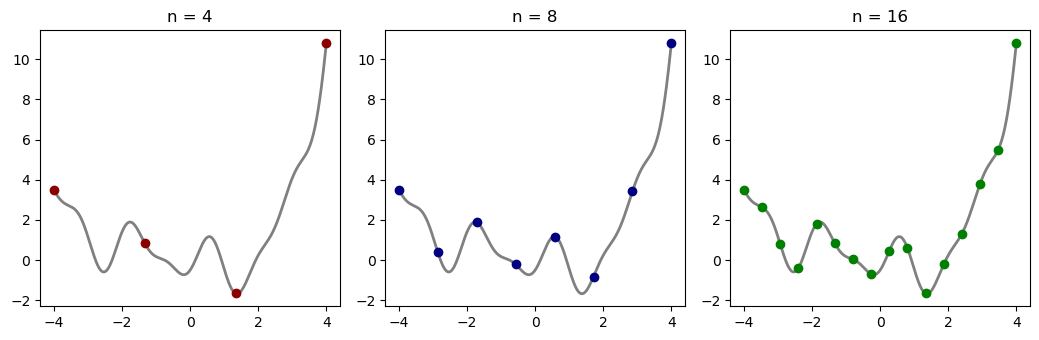

In [9]:
# Select 4 random values of x and calculate y for those values
x_4 = np.linspace(x_min, x_max, 4)
y_4 = function_1(x_4)

# Select 8 random values of x and calculate y for those values
x_8 = np.linspace(x_min, x_max, 8)
y_8 = function_1(x_8)

# Select 8 random values of x and calculate y for those values
x_16 = np.linspace(x_min, x_max, 16)
y_16 = function_1(x_16)

print (f"The minimum value found after 4 grid samples is {y_4.min():.4f}.")
print (f"The minimum value found after 8 grid samples is {y_8.min():.4f}.")
print (f"The minimum value found after 16 grid samples is {y_16.min():.4f}.")

fig, ax = plt.subplots(ncols = 3)
ax[0].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[1].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[2].plot(_x, _y, color = "grey", linewidth = 2, zorder = 0)
ax[0].scatter(x_4, y_4, c = "darkRed")
ax[1].scatter(x_8, y_8, c = "navy")
ax[2].scatter(x_16, y_16, c = "green")

ax[0].set_title("n = 4")
ax[1].set_title("n = 8")
ax[2].set_title("n = 16")

fig.set_figwidth(10.5)
fig.set_figheight(3.5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_gridSampling.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


<span style="color:lime;">You should notice something interesting happening to the global minimum as n increases. Why?</span>

### 2.3.2 How Many Grid Samples are Required to be Confidant We Have Found the Minimum?

We will follow a similar procedure to the randomly generated numbers.

The global minimum found was -1.6742230338948834.
Image saved to outputs/images/Lecture 6B_gridSampling2.svg.


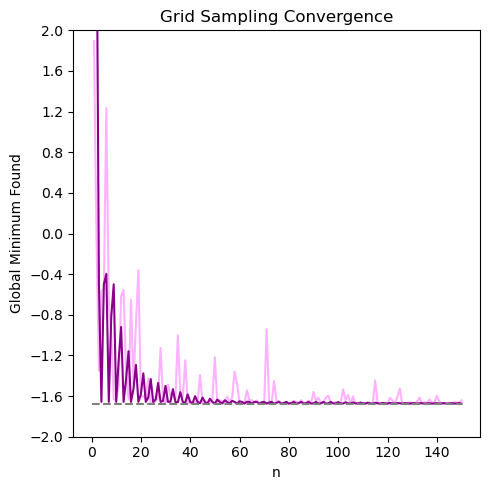

In [10]:
# Set the maximum number of samples we want to take
max_n_samples = 150

X = list(range(1, max_n_samples + 1))

# Initialize a list to store the minimum values
minimums_grid = []

for n in X:
    # Select n random values of x and calculate y for those values
    x = np.linspace(x_min, x_max, n)
    y = function_1(x)
    # Store the minimum of y
    minimums_grid.append (y.min())

globalMinimum = min(minimums_grid)
print (f"The global minimum found was {globalMinimum}.")

# Plot the results
fig, ax = plt.subplots()
# First plot the old results faded
ax.plot(X, minimums_random, c = "magenta", alpha = 0.3)
ax.plot(X, minimums_grid, c = "darkmagenta")

# Add a line indicating the minimum value found
ax.plot([0, max_n_samples], [globalMinimum, globalMinimum], color = "grey", linestyle = "--")

ax.set_title("Grid Sampling Convergence")
ax.set_xlabel("n")
ax.set_ylabel("Global Minimum Found")
ax.set_ylim([-2, 2])
ax.set_yticks(np.linspace (-2, 2, 11))

fig.set_figwidth(5)
fig.set_figheight(5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_gridSampling2.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


The convergence to the global minimum is not necessarily quicker, but is more predictable and with less spikes. 

<span style = "color:lime;">Can you explain why there is a cyclic pattern?</span>

## 3. Two-dimensional Problem

Let's follow a similar procedure for a two-dimensional problem. We will use one of the objective functions from Exercise 4A as the equation.

In [11]:
# Set the limits for analysis
x_min = -3
x_max = 3


### 3.1 Plotting the Function

Visulaize the function as a contour plot.

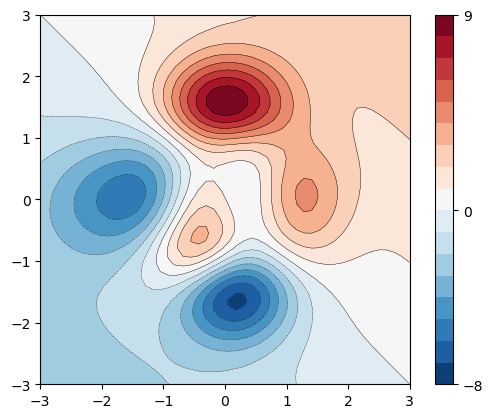

In [12]:
# Create vectors of x_1 and x_2
n_intervals = 50
x_1 = np.linspace(x_min, x_max, n_intervals)
x_2 = np.linspace(x_min, x_max, n_intervals) # NOTE: This is reversed to make plotting with easier

# Create sets of coordinates for each point in the grid
X_1, X_2 = np.meshgrid (x_1, x_2)

# Calculate the value of the function
Z = function_2(X_1, X_2)

# Create a contour plot of the resulting function
fig, ax = plt.subplots()

# Determine nice limits for the contour lines
Z_min = np.floor(Z.min())
Z_max = np.ceil(Z.max())

delta = 1.0
levels = np.arange(Z_min, Z_max + 0.01, delta)

# Draw the contour plots. ax.ontourf draws a filled contour plot. ax.contour draws the outlines
cmap = "RdBu_r"
contourPlot = ax.contourf(X_1, X_2, Z, levels = levels, cmap = "RdBu_r")
contourOutlines = ax.contour(X_1, X_2, Z, levels = levels, colors = "k", linewidths = 0.3)

# Instruct matplotlib to draw square, undistorted grids
ax.set_aspect("equal", "box")

# Create a colourbar to the right of both figures
plt.colorbar(contourPlot, ticks = [Z_min, 0, Z_max])

plt.show()

### 3.2 Random Sampling

Similar to Section 2.2, we will begin with random sampling to try and find the minimum.

<span style = "color:lime;"> Before beginning, how many random samples do you think are required to be confident you found the minimum? More or less than the one-dimensional problem.</span>

The minimum value found after 4 random samples is -3.5445.
The minimum value found after 8 random samples is -5.2512.
The minimum value found after 16 random samples is -5.4480.
Image saved to outputs/images/Lecture 6B_2DrandomSampling.svg.


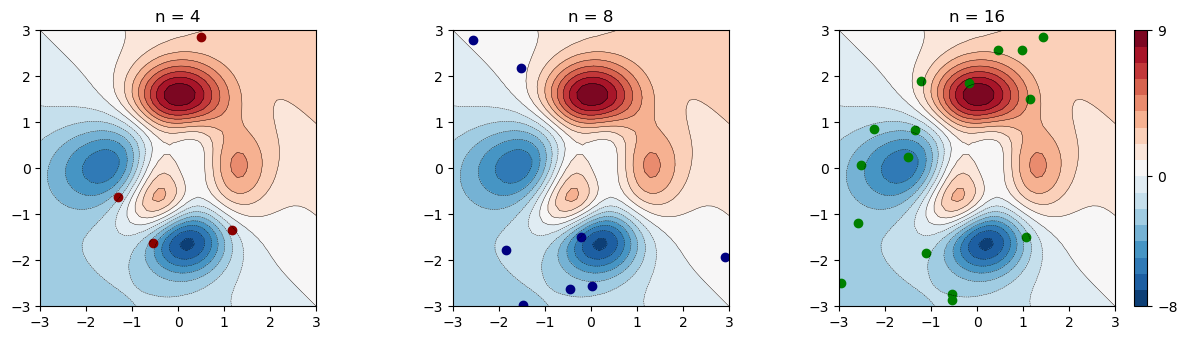

In [14]:
# Set up a random number generator (RNG) object with a fixed random seed.
rng = np.random.default_rng(random_seed)

# 4 random samples
x_4 = rng.uniform(x_min, x_max, (4, 2))
y_4 = function_2(x_4[:, 0], x_4[:, 1])

# 8 random samples
x_8 = rng.uniform(x_min, x_max, (8, 2))
y_8 = function_2(x_8[:, 0], x_8[:, 1])

#16 random samples
x_16 = rng.uniform(x_min, x_max, (16, 2))
y_16 = function_2(x_16[:, 0], x_16[:, 1])

print (f"The minimum value found after 4 random samples is {y_4.min():.4f}.")
print (f"The minimum value found after 8 random samples is {y_8.min():.4f}.")
print (f"The minimum value found after 16 random samples is {y_16.min():.4f}.")

# Draw the background contour plots for all three axes
fig, ax = plt.subplots(ncols = 3)
contourPlot = ax[0].contourf(X_1, X_2, Z, levels = levels, cmap = "RdBu_r")
contourOutlines = ax[0].contour(X_1, X_2, Z, levels = levels, colors = "k", linewidths = 0.3)
contourPlot = ax[1].contourf(X_1, X_2, Z, levels = levels, cmap = "RdBu_r")
contourOutlines = ax[1].contour(X_1, X_2, Z, levels = levels, colors = "k", linewidths = 0.3)
contourPlot = ax[2].contourf(X_1, X_2, Z, levels = levels, cmap = "RdBu_r")
contourOutlines = ax[2].contour(X_1, X_2, Z, levels = levels, colors = "k", linewidths = 0.3)

# Draw the data points
ax[0].scatter(x_4[:, 0], x_4[:, 1], c = "darkRed")
ax[1].scatter(x_8[:, 0], x_8[:, 1], c = "navy")
ax[2].scatter(x_16[:, 0], x_16[:, 1], c = "green")

ax[0].set_title("n = 4")
ax[1].set_title("n = 8")
ax[2].set_title("n = 16")

# Instruct matplotlib to draw square, undistorted grids
ax[0].set_aspect("equal", "box")
ax[1].set_aspect("equal", "box")
ax[2].set_aspect("equal", "box")

# Create a colourbar to the right of both figures
plt.colorbar(contourPlot, ticks = [Z_min, 0, Z_max])

fig.set_figwidth(12.5)
fig.set_figheight(3.5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_2DrandomSampling.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


Results may vary depending on the random seed chosen. You should find that the minimum value found *stays the same or decreases* as we increase the number of samples.

<span style = "color:dodgerblue"> Note: That I am passing a tuple to the np.random.uniform function. Here I am telling it to give me a 4 rows X 2 columns array of random values. x<sub>1</sub> is the first column and x<sub>2</sub> is the second column. You can index to just a single column using the colon operator (:). So x[:, 1] is saying select all the rows in x, and take just the second column. </span>

### 3.2.2 How Many Random Samples are Required to be Confidant We Have Found the Minimum?

To answer this we will do the same procedure as above but increase the number of samples one-by-one until we begin to converge.

For this part of the exercise, we will turn off the random number generator.

The global minimum found was -7.258917775613582.
Image saved to outputs/images/Lecture 6B_2DrandomSampling2.svg.


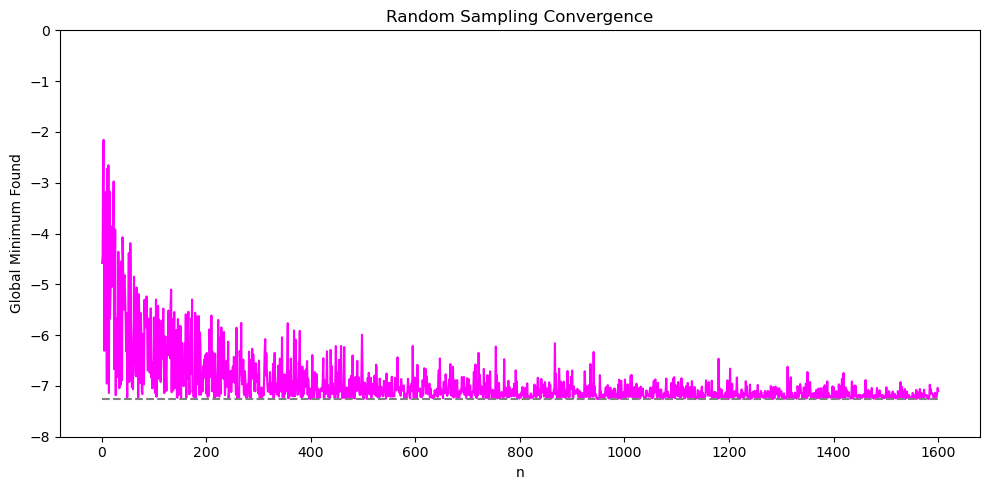

In [15]:
# Set the maximum number of samples we want to take.
# NOTE: This is a clue to the question above
max_n_samples = 1600

X_random = list(range(1, max_n_samples + 1))

# Initialize a list to store the minimum values
minimums_random = []

for n in X_random:
    # Select n random values of x and calculate y for those values
    x = np.random.uniform(x_min, x_max, (n, 2))
    y = function_2(x[:, 0], x[:, 1])
    # Store the minimum of y
    minimums_random.append (y.min())

globalMinimum = min(minimums_random)
print (f"The global minimum found was {globalMinimum}.")

# Plot the results
fig, ax = plt.subplots()
ax.plot(X_random, minimums_random, c = "magenta")

# Add a line indicating the minimum value found
ax.plot([0, max_n_samples], [globalMinimum, globalMinimum], color = "grey", linestyle = "--")

ax.set_title("Random Sampling Convergence")
ax.set_xlabel("n")
ax.set_ylabel("Global Minimum Found")
ax.set_ylim([-8, 0])
ax.set_yticks(np.linspace (-8, 0, 9))

fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_2DrandomSampling2.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


### 3.3 Grid Sampling

The global minimum found was -7.246765158187633.
Image saved to outputs/images/Lecture 6B_2DgridSampling2.svg.


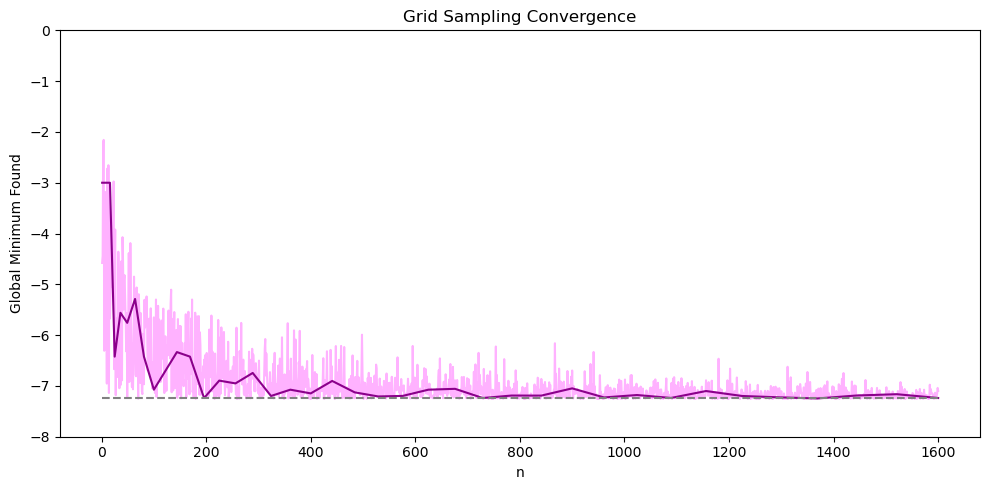

In [16]:
# Set the maximum number of samples we want to take
# NOTE because this is a 2D plot, the number of samples must be a square of an integer to be equally spaced.

samples_per_dimension = 40
n_samples = np.arange(1, samples_per_dimension + 1, 1) ** 2

X_grid = list(range(1, samples_per_dimension + 1))

# Initialize a list to store the minimum values
minimums_grid = []

for n in X_grid:
    # Select n random values of x and calculate y for those values
    x_1 = np.linspace(x_min, x_max, n)
    x_2 = np.linspace(x_min, x_max, n)
    
    # Create sets of coordinates for each point in the grid
    X_1, X_2 = np.meshgrid (x_1, x_2)

    y = function_2(X_1, X_2)
    # Store the minimum of y
    minimums_grid.append (y.min())

globalMinimum = min(minimums_grid)
print (f"The global minimum found was {globalMinimum}.")

# Plot the results
fig, ax = plt.subplots()
# First plot the old results faded
ax.plot(X_random, minimums_random, c = "magenta", alpha = 0.3)
ax.plot(n_samples, minimums_grid, c = "darkmagenta")

# Add a line indicating the minimum value found
ax.plot([0, max_n_samples], [globalMinimum, globalMinimum], color = "grey", linestyle = "--")

ax.set_title("Grid Sampling Convergence")
ax.set_xlabel("n")
ax.set_ylabel("Global Minimum Found")
ax.set_ylim([-8, 0])
ax.set_yticks(np.linspace (-8, 0, 9))

fig.set_figwidth(10)
fig.set_figheight(5)
fig.tight_layout()

# Save the file in vector format (.svg)
Path.mkdir(Path("outputs", "images"), exist_ok = True)
filePath = Path("outputs", "images", "Lecture 6B_2DgridSampling2.svg")
plt.savefig(filePath, format = "svg")

print (f"Image saved to {filePath}.")

plt.show()


Similar to the 1-D case, grid sampling converges more predictably and with reduced error than random sampling.

Notice that convergence took much longer than in the 1-D case. 

## 4. Next Steps

Next week we will discuss other sampling methods, including latin hypercube, full-factorial and fractional-factorial sampling.
In two weeks, we will discuss optimization algorithms which allows us to search for the minimum more efficiently.

## 5. Tutorial 6 Summary

In this tutorial, you will have learned:
* How to run EnergyPlus simulations in parallel and collect the results.
* How to sample from discrete and continuous variables
* How to generate samples from the simulationParameters json files and then simulate them
* The effectiveness of random sampling vs grid sampling can have on finding the optimum points of problems.